Mean Squared Error: 0.2615


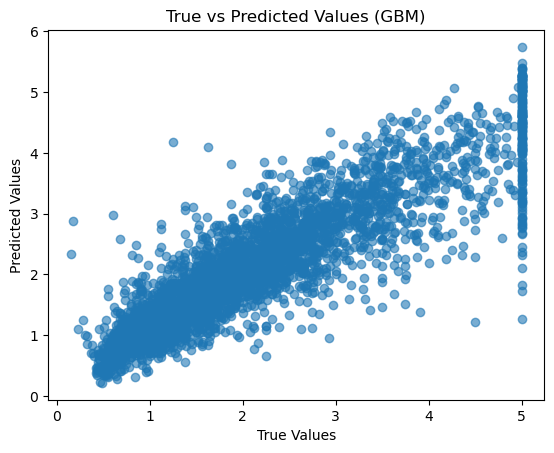

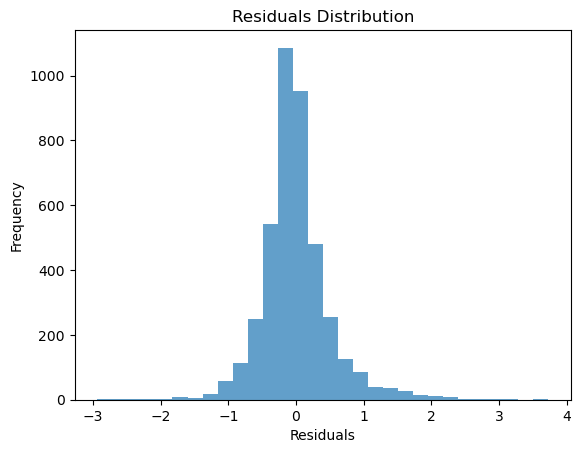

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        """
        Initialize the Gradient Boosting Machine.
        :param n_estimators: Number of weak learners (trees).
        :param learning_rate: Contribution of each tree.
        :param max_depth: Maximum depth of individual trees.
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        """
        Train the GBM model.
        :param X: Input features (n_samples, n_features).
        :param y: Target values (n_samples).
        """
        # Initialize predictions with the mean of the target
        self.initial_prediction = np.mean(y)
        predictions = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            # Compute residuals (negative gradient of squared error)
            residuals = y - predictions

            # Fit a weak learner (decision tree) on the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Add tree to the list
            self.trees.append(tree)

            # Update predictions with scaled tree predictions
            predictions += self.learning_rate * tree.predict(X)

    def predict(self, X):
        """
        Predict using the trained GBM model.
        :param X: Input features (n_samples, n_features).
        :return: Predicted values (n_samples).
        """
        predictions = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GBM model
gbm = GradientBoostingMachine(n_estimators=200, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (GBM)")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
